In [128]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import binom, norm, bernoulli, geom, nbinom, poisson, uniform, gamma

# 폰트 관련 경고 메시지 숨기기
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'

## PMF(확률 질량 함수, Probability Mass Function)
이산확률분포(discrete probability distribution)에서 특정 값이 발생할 확률을 계산할 때 사용

10명 중 정확히 4명이 치킨을 주문할 확률: 0.2508


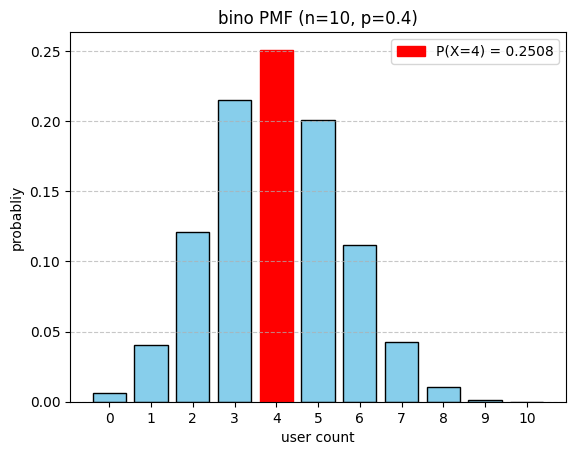

In [63]:
# 치킨집 예제
n = 10 # 총 방문 손님 수
p = 0.4 # 한 명이 치킨을 주문할 확률
k = 4 # 정확히 4명이 주문할 확률

# 0 ~ n까지의 모든 가능한 값에 대한 확률 계산
x = np.arange(0, n+1)
prob_4_orders = binom.pmf(x, n, p) # 이항분포(Binomial Distribution)의 확률 질량 함수 계산
print(f"10명 중 정확히 4명이 치킨을 주문할 확률: {float(prob_4_orders[k]):.4f}") # 정확히 4명이 주문할 확률

# 그래프 그리기
bars = plt.bar(x, prob_4_orders, color='skyblue', edgecolor='black')
plt.xlabel('user count')
plt.ylabel('probabliy')
plt.title('bino PMF (n=10, p=0.4)')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# k=4인 경우만 빨간색으로 강조
bars[k].set_color('red')  # k번째 막대만 빨간색으로 변경
bars[k].set_label(f'P(X={k}) = {float(prob_4_orders[k]):.4f}')  # k번째 막대에 대한 레이블 설정

plt.legend()

# 그래프 출력
plt.show()

## CDF(Cumulative Distribution Function, 누적 분포 함수)와 PDF(Probability Density Function, 확률 밀도 함수)
- CDF를 미분하면 PDF
- PDF를 적분하면 CDF

array([0.50201485, 0.52818455, 0.55423309, 0.58004953, 0.60552593,
       0.63055866, 0.65504968, 0.67890767, 0.70204908, 0.72439889,
       0.74589138, 0.76647055, 0.78609049, 0.80471548, 0.82231994,
       0.83888825, 0.85441434, 0.86890121, 0.88236029, 0.89481073,
       0.9062786 , 0.91679603, 0.9264003 , 0.93513298, 0.94303904,
       0.95016593, 0.95656283, 0.96227982, 0.96736719, 0.97187482,
       0.97585159, 0.97934495, 0.98240046, 0.9850615 , 0.98736904,
       0.98936143, 0.99107432, 0.99254058, 0.99379033])

array([0.40412134, 0.42518792, 0.44615696, 0.46693916, 0.48744763,
       0.50759895, 0.52731419, 0.54651984, 0.56514865, 0.58314022,
       0.60044164, 0.61700785, 0.63280188, 0.64779497, 0.66196655,
       0.67530401, 0.6878025 , 0.69946441, 0.71029895, 0.72032154,
       0.72955316, 0.73801968, 0.7457511 , 0.7527809 , 0.75914527,
       0.76488241, 0.77003191, 0.77463407, 0.7787294 , 0.78235804,
       0.78555934, 0.78837148, 0.79083116, 0.7929733 , 0.79483086,
       0.79643474, 0.79781361, 0.79899395, 0.8       ])

61
19.01010101010101


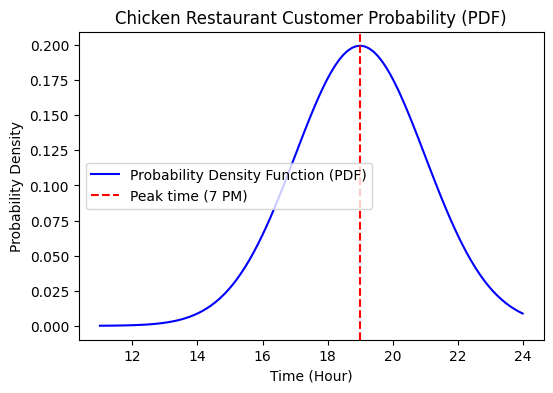

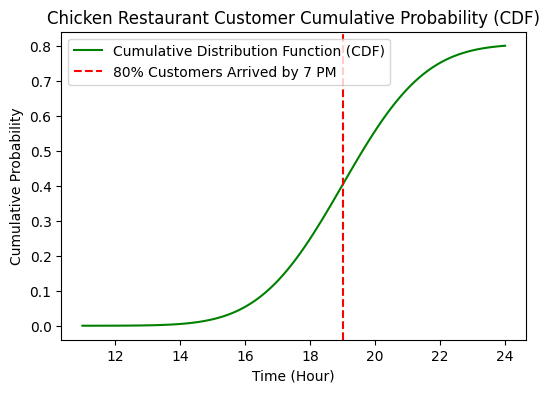

In [77]:
# 서비스 운영 시간 범위 (오전 11시 ~ 밤 12시)
time_hours = np.linspace(11, 24, 100)

# PDF: 오후 7시(19시) 피크 타임
peak_time = 19
spread = 2 # 확률 분포의 퍼짐 정도(±2시간)
pdf_values = norm.pdf(time_hours, peak_time, spread) # 확률 밀도 함수 계산

# CDF: 누적 확률 계산
cdf_values = norm.cdf(time_hours, peak_time, spread)

# CDF를 조정하여 오후 7시(19시)이전에 80% 도달
display(cdf_values[time_hours >= 19])
cdf_values = cdf_values / np.max(cdf_values) * 0.8
cdf_values[time_hours >= 19] = 0.8 + (cdf_values[time_hours >= 19] - 0.8) / (1 - 0.8) * 0.2
display(cdf_values[time_hours >= 19])

# PDF에서 피크 시간 찾기
peak_index = np.argmax(pdf_values)
print(peak_index)
peak_time_exact = time_hours[peak_index]
print(peak_time_exact)

# PDF 그리기
plt.figure(figsize=(6, 4))
plt.plot(time_hours, pdf_values, label="Probability Density Function (PDF)", color='blue')
plt.axvline(19, color='red', linestyle='--', label="Peak time (7 PM)")  # 피크 시간 표시
plt.xlabel("Time (Hour)")  # x축: 시간 (시)
plt.ylabel("Probability Density")  # y축: 확률 밀도
plt.title("Chicken Restaurant Customer Probability (PDF)")  # 그래프 제목
plt.legend()
plt.show()

# CDF 개별 그래프 그리기
plt.figure(figsize=(6, 4))
plt.plot(time_hours, cdf_values, label="Cumulative Distribution Function (CDF)", color='green')
plt.axvline(19, color='red', linestyle='--', label="80% Customers Arrived by 7 PM")  # 80% 도달 시점 표시
plt.xlabel("Time (Hour)")  # x축: 시간 (시)
plt.ylabel("Cumulative Probability")  # y축: 누적 확률
plt.title("Chicken Restaurant Customer Cumulative Probability (CDF)")  # 그래프 제목
plt.legend()
plt.show()

## 베르누이 분포(Bernoulli distribution)
- 개념 : 성공/실패와 같은 이진 결과를 다루는데 유용
- 활용 : A/B TEST, 머신러닝 이진 분류, 게임 분석등에 다양하게 사용 

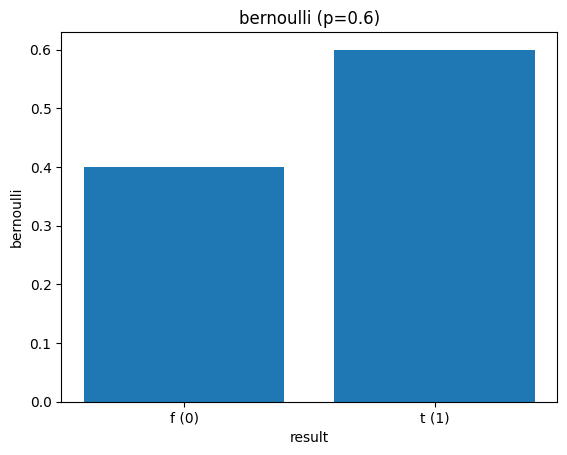

성공 확률: 0.6
실패 확률: 0.4


In [81]:
# 성공 확률 P
p = 0.6

# 데이터 생성
x = [0, 1]
y = bernoulli.pmf(x, p)

# 그래프 그리기
plt.bar(x, y, tick_label=['f (0)', 't (1)' ])
plt.title(f'bernoulli (p={p})')
plt.xlabel('result')
plt.ylabel('bernoulli')
plt.show()

# 성공 확률과 실패 확률 출력
print(f"성공 확률: {p}")
print(f"실패 확률: {1-p}")

## 이항분포(Binomial distribution)
- 베르누이 시행을 여러 번 반복했을 때, 성공한 횟수를 나타낸 확률 분포
- 이진 결과(성공/실패)를 가지는 실험을 n번 수행했을 때, 성공이 발생한 횟수에 대한 분포

## 특징
- 독립 시행 : n번의 시행이 서로 독립적, 시행 결과가 다른 시행 결과에 영향을 안줌 
- 성공 확률 P : 각 시행에서 성공할 확률은 P로 일정
- 이진 결과 : 각 시행 결과는 성공(1) 또는 실패(0)로 나타냄
- 매개변수 : 
    - n: 시행 횟수
    - p: 성공 확룰

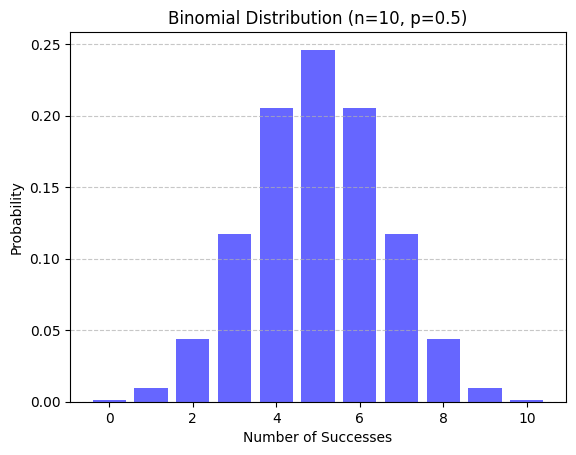

Probability of 5 successes out of 10 trials: 0.2461


In [84]:
# 시행 횟수 n, 성공 확률 p
n = 10
p = 0.5

# 이항분포 데이터 생성
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

# 확률 분포 그래프 그리기
plt.bar(x, y, color='blue', alpha=0.6)
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 특정 성공 횟수 확률 계산 (5번 성공할 확률)
k = 5
prob = binom.pmf(k, n, p)
print(f"Probability of {k} successes out of {n} trials: {prob:.4f}")

100명 중 10명이 클릭할 확률: 0.0420


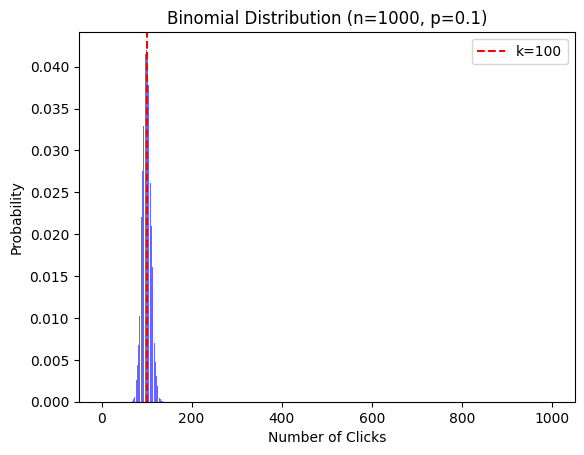

In [90]:
# 이메일 클릭 확률
p = 0.1 # 성공 확률 (이메일 클릭 확률)
n = 1000 # 이메일을 보낸 고객 수
k = 100 # 클릭할 고객 수

# 5명이 클릭할 확률 계산
prob_5_clicks = binom.pmf(k, n, p)
print(f"100명 중 10명이 클릭할 확률: {prob_5_clicks:.4f}")

# 확률 분포 그래프 그리기
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.bar(x, y, color='blue', alpha=0.6)
plt.axvline(k, color='red', linestyle='dashed', label=f'k={k}')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Clicks')
plt.ylabel('Probability')
plt.legend()
plt.show()

## 기하분포(Geometric distribution)
- 베르누이 시행(Bernoulli tial)에서 처음 성공이 나올 때까지 시행 횟수에 대한 확률 분포
- 몇 번 시행 후 처음으로 성공이 나오는지 모델링

## 특징
- 독립 시행 :각각의 시행은 독립적
- 성공 확률 : 각 시행에서 성공할 확률은 P로 일정
- 이산 확률 분포 : 시행 횟수는 이산적인 값만 가짐
- 변수 정의:
    - X: 처음으로 성공이 나올 때까지의 시행 횟수

## 활용 사례
- 게임 분석: 특정 아이템을 얻기 위해 몇 번이 시도가 필요한지 모델링
- 품질 관리: 생산 라인에서 처음으로 불량품이 발견되기까지의 검사 횟수
- 마케팅: 고객이 특정 광고에 반응하기까지 몇 번의 광고가 필요한지 분석


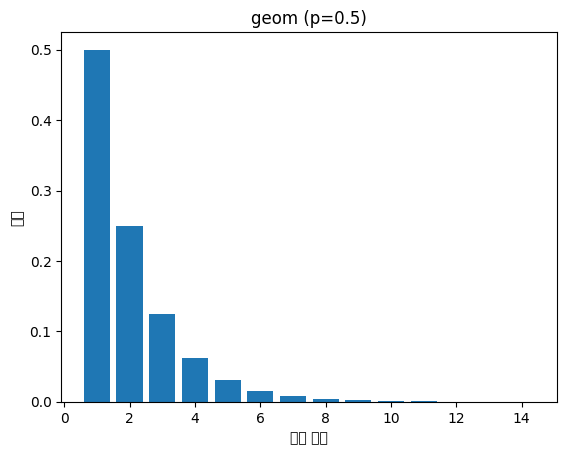

3번째 시도에서 성공할 확률: 0.1250


In [95]:
# 성공 확률 p
p = 0.5

# 기하분포 데이터 생성
x = np.arange(1, 15) #1부터 14까지
y = geom.pmf(x, p) # 각 시행 횟수에 대한 확률 질량 함수 계산

# 그래프 시각화
plt.bar(x, y)
plt.title(f'geom (p={p})')
plt.xlabel('시행 횟수')
plt.ylabel('확률')
plt.show()

# 특정 시행 횟수 확률 (예: 3번째 시도에서 성공할 확률)
k = 3
prob = geom.pmf(k, p)
print(f"{k}번째 시도에서 성공할 확률: {prob:.4f}")

## 음이항분포(Negative Binomial Distribution)
- 베르누이 시행에서 r번의 성공이 발생할 때까지 필요한 시행 횟수 모델링 이산 확률 분포

## 특징
- 독립 시행 : 각각의 시행은 독립적
- 성공 확률 p : 각 시행에서 성공할 확률 p는 일정
- 변수 정의:
    - X: r번의 성공이 발생하기까지의 실패 횟수 또는 시행 횟수
- 기하분포의 일반화된 형태

## 활용 사례
- 게임 분석: 특정 아이템을 r번 얻기 위해 몇 번의 시도가 필요한지 모델링
- 품질 관리: 생산 라인에서 r번의 불량품이 발견되기까지 검사한 제품 수
- 마케팅: 고객이 특정 행동(구매, 클릭)을 r번 할때까지 필요한 시도 횟수

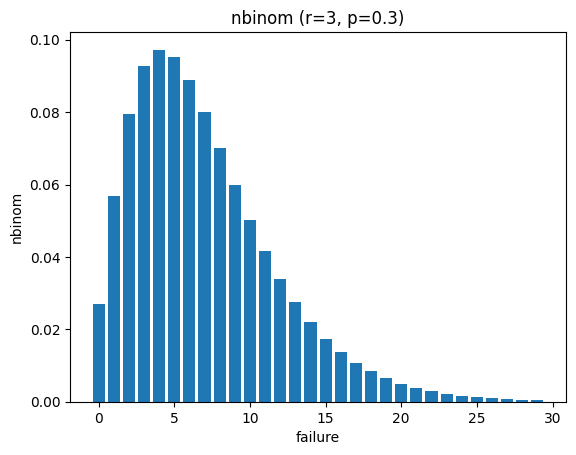

5번째 방문에서 3번째에 구매 성공할 확률: 0.0953


In [99]:
# 성공 횟수 r, 성공 확률 p
r = 3 # 목표 구매 횟수
p = 0.3 # 방문당 구매 확률

# 음이항분포 데이터 생성
x = np.arange(0, 30)
y = nbinom.pmf(x, r, p)

# 그래프 그리기
plt.bar(x, y)
plt.title(f'nbinom (r={r}, p={p})')
plt.xlabel('failure')
plt.ylabel('nbinom')
plt.show()

# 특정 실패 횟수 확률 (예: 10번 방문 후 5번째 구매 성공)
k = 5
prob = nbinom.pmf(k, r, p)
print(f"{k}번째 방문에서 {r}번째에 구매 성공할 확률: {prob:.4f}")

## 포아송 분포(Poisson distribution)
- 특정 시간 또는 공간 내에서 어떤 사건이 일정한 평균 발생률로 발생할 때, 그 사건의 발생 횟수를 모델링하는 이산 확률 분포
- 드문 사건 혹은 희귀한 상황 분석에 사용

## 특징
- 시간적/공간적 간격 내에서 사건 발생: 사건은 특정 시간 또는 공간 내에서 발생
- 독립성: 사건 발생은 서로 독립적
- 평균 발생률:
    - 사건이 발생하는 평균 횟수는 일정하며, 이를 λ (람다)라고 함
    - λ: 단위 시간 또는 공간 내에서 사건이 발생하는 평균 횟수 
- 드문 사건:
    - 드물게 발생하는 사건을 모델링하는데 적합

## 활용 사례
- 산업 및 서비스:
    - 고객 서비스 센터의 전화 수, 병원의 환자 도착 수 등
- 교통:
    - 교통사고 발생 횟수, 도로에서 차량이 지나가는 빈도
- 통신:
    - 네트워크 패킷 손실, 서버 접속 오류 횟수
- 자연 현상:
    - 지진 발생 횟수, 별똥별 관측 횟수

특정 시간대에 문의가 25건 이상 올 확률: 0.0112


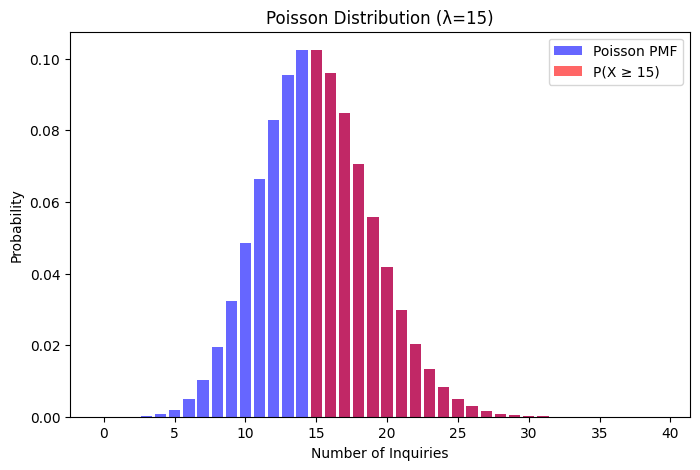

In [111]:
# 평균 도착률 (시간당 평균 20건의 문의가 옴)
lambda_ = 15

# 특정 시간대에 25건 이상 문의가 올 확률
prob_25_or_more = 1 - poisson.cdf(24, lambda_)
print(f"특정 시간대에 문의가 25건 이상 올 확률: {prob_25_or_more:.4f}")

# 포아송 분포 확률 진량 함수 PMF 계산
x = np.arange(0, 40)  # 0건 ~ 40건 범위
y = poisson.pmf(x, lambda_)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='blue', alpha=0.6, label="Poisson PMF")

# 25건 이상 구간 강조 (확률 부분 색 다르게)
plt.bar(x[x >= 15], y[x >= 15], color='red', alpha=0.6, label="P(X ≥ 15)")

# 그래프 제목 및 라벨 설정
plt.xlabel("Number of Inquiries")  # x축: 문의 건수
plt.ylabel("Probability")  # y축: 확률
plt.title(f"Poisson Distribution (λ={lambda_})")  # 제목
plt.legend()
plt.show()

## 정규분포(Nomal distribution, 가우스 분포(Gaussian distribution))
- 데이터가 평균값을 중심으로 대칭적으로 분포

## 특징
- 종 모양 곡선: 정규 분포의 그래프는 평균을 중심으로 좌우 대칭인 종(bell) 모양
- 평균과 표준편차로 정의:
    - 정규 분포는 평균(μ)과 표준편차(σ)로 정의
        - μ: 평균(데이터의 중심 위치)
        - σ: 표준편차(데이터의 흩어짐 정도)
- 평균과 표준편차가 달라지면 불포의 위치와 폭도 변함
- 확률 밀도 함수(PDF)
    - x: 확률 변수
    - μ: 평균
    - σ제곱: 분산
- 대칭성:
    - 평균(μ)를 기준으로 좌우 대칭
    - 평균 = 중앙값 = 최빈값
- 68-95-99.7 규칙:
    - 정규 분포에서 데이터는 평균을 중심으로 아래와 같이 분포
        - 68% 데이터 평균 ± 1σ 범위 내 존재
        - 약 95%의 데이터가 평균 ± 2σ 범위 내에 존재
        - 약 99.7%*의 데이터가 평균 ± 3σ 범위 내에 존재
- 표준 정규 분포(Standard Normal Distribution)
    - 평균이 0이고, 표준편차가 1인 정규 분포
    - 확률 변수 Z로 나타냄
    - 일반 정규 분포를 변환하여 얻을 수 있음

## 활용 예시
    - 마케팅
        - 고객 행동 분석
            - 고객 구매 금액 분포
                - 특정 기간 동안 고객당 평균 구매 금액 정규분포일 때,
                - 예: 고객 1인당 평균 구매 금액이 5만원이고, 표준편차가 1만원일 때, 고객 구매 금액 분포 분석 -> 평균 이상 소비자 타겟팅 가능
            - 광고 클릭률
                - 특정 광고 캠페인 클릭률 정규분포알 때, 평균 클릭률과 표준편차를 계산 캠페인 성과 평가
                - 평균 CTR이 5% 표준편차 1%, 성과가 낮은 광고 개선 혹은 제거 가능
        - 시장 세분화
            - 고객 나이 분포
                - 특정 제품/서비스 주요 고객층 나이가 정규분포 일 때,
                - 예: 주요 고객층 평균 나이 35세, 표준편차 5세 -> 마케팅 메시지 3~40대 고객에게 집중 전략 가능
        - A/B 테스트 결과 분석
            - 광고 디자인 A/B 테스트 시, 데이터가 정규분포라고 가정 평균 차이 검정
            - 새로운 광고 평균 전환율 7.5%, 기존 광고 평균 전환율 6.8% -> 두 그룹 간 차이 통계적으로 유의미한지 분석
        - 고객 만족도 조사
            - 고객 만족도 점수가 정규분포일때, 평균과 표준편차를 계산 고객 경험 개선에 활용
            - 예: 평균 만족도 점수가 8점 이상인 고객 "충성 고객"으로 분류, 특별한 혜택을 제공하는 전략 수립 가능
    - 프로덕트
        - 제품 사용 패턴 분석
            - 일일 사용자 수 분석
                - 일일 사용자수가 정규분포일 때, 평균 DAU와 표준편차를 계산 이상치 탐지
                - 예: 평균 DAU가 1만명이고 표준편차가 1000명일 때, 갑작스러운 DAU 감소(7,000명 미만)가 발생하면 원인 분석
            - 세션 시간 분석
                - 사용자가 제품을 이용하는 평균  세션 시간이 정규분포일 때,
                - 평균 세션 시간이 5분, 표준편차 1분, 세션 시간이 짧은 사용자(2분 이하)를 대상으로 리텐션 전략 수립
    - 제품 품질
        - 제품 결함률 분석
            - 생산된 제품의 결함률이 정규분포일 때, 평균 결함률과 표준편차를 계산 품질 관리 활용
            - 예: 평균 결함률 1%, 표준편차 0.2%, 특정 공정에서 결함률이 1.5% 이상인 경우 문제 해결
    - 사용자 피드백 분석
        -NPS(Net Promotor Score)분석
            - NPS가 정규분포일 때, 평균과 표준편차 계산 사용자 만족도 평가
            - 예: 평균 NPS가 50점, 표준편차 10점, NPS가 낮은 사용자 그룹을 대상으로 개선 방안 모색
    - 로드맵 우선순위 설정
        - 기능 사용 빈도
            - 특정 기능의 사용 빈도가 정규분포일 때, 평균 사용 빈도와 표준편차 분석해 중요도가 낮은 기능을 제거하거나 개선 우선순위 설정
            - 예: 평균 사용 빈도 1,000회/일, 표준편차 200회, 사용 빈도가 푱균보다 낮은 기능 개선 대성으로 선정


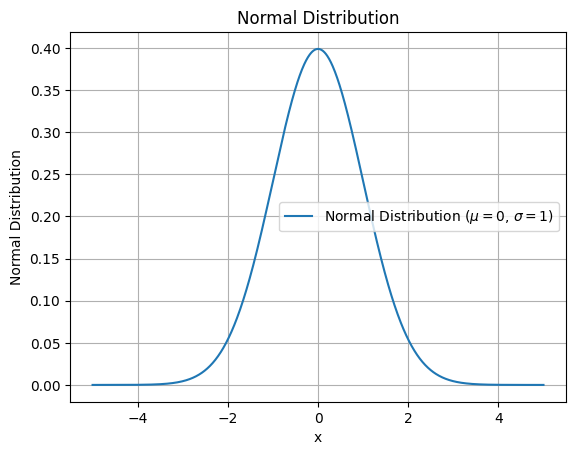

-1과 1 사이에 위치할 확률: 0.6827


In [115]:
# 평균과 표준편차
mu = 0
sigma = 1

# 정규분포 데이터 생성
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, mu, sigma)

# 그래프 그리기
plt.plot(x, y, label=f'Normal Distribution ($\mu={mu}$, $\sigma={sigma}$)')
plt.title('Normal Distribution')
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.legend()
plt.grid()
plt.show()

# 특정 구간에 있을 확률 계산 (예: -1 < x < 1)
prob = norm.cdf(1, mu, sigma) - norm.cdf(-1, mu, sigma)
print(f"-1과 1 사이에 위치할 확률: {prob:.4f}")

## 균등 분포 (Uniform distribution)
- 모든 값이 동일한 확률로 발생하는 분포
- 특정 구간 내에 모든 값이 동잃한 가능성을 가지는 경우

## 종류
- 이산 균등 분포 (discrete uniform distribution)
    - 이산적인 값들 사이에 모든 값이 동일한 확률
    - 예:  주사위 눈은 각각 동일한 확률을 가짐
- 연속 균등 분포 (continuous uniform distribution)
    - 연속적인 구간에서 모든 값이 동일한 확률 밀도를 가짐
    - 예: 0과 1사이의 숫자가 동일한 확률로 나오는 경우
    - 특징
        - 구간 [a, b]내의  값들은 동일한 확률 밀도를 가짐
        - 구간 밖의 값들은 확률이 0임
        - 전체 확률은 항상 1이므로, f(x)*(b-a) = 1을 만족함

## 활용 예시
- 랜덤 추첨 이벤트
    - 랜덤 쿠폰 지급
        - 고객에게 고유 ID를 부여하고, ID를 균등분포를 기반으로 무작위 선택하여 당첨자 결정
- A/B 테스트에서 사용자 그룹 분배
    - 사용자를 무작위로 A 또는 B그룹에 배정
- 랜덤 추천 시스템
    - 고객에게 무작위로 제품을 추천하는데 사용 -> 초기 사용자 데이터가 부족할 떄 유용
    - 예: 신규 가입자에게 다양한 제품을 랜덤으로 보여주어 선호도 파악
    - 균등분포로 랜덤 추천 하면 특정 제품이 과도하게 노출되지 않고, 모든 제품이 동일한 확률로 추천
- 광고 슬롯 무작위 배정
    - 광고를 특정 시간대나 위치에 무작위로 배정하여 공정성 보장
- 랜덤 샘플링을 통한 시장 조사
    - 고객 데이터에서 랜덤 샘플링을 통해 특정 그룹을 선정 -> 설문조사나 인터뷰 진행
- 랜덤 배송비 할인 이벤트
    - 고객이 결제할 때 랜덤으로 배송비를 할인해주는 이벤트 진행
- 랜덤 콘텐츠 노출
    - 특정 콘텐츠를 무작위로 노출하여 고객 관심사 파악 -> 콘텐츠 관심에 대한 초기 데이터 수집에 유용

np.float64(0.3)

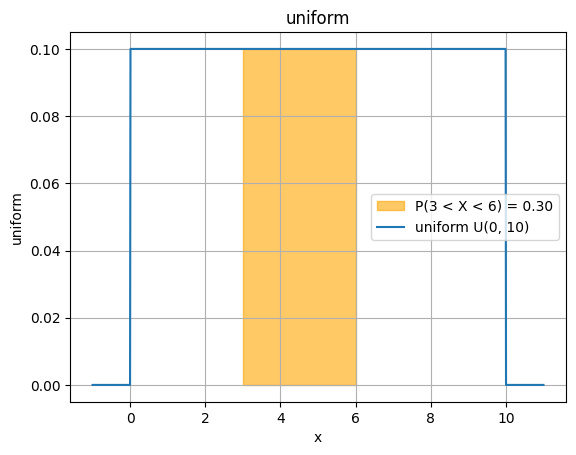

In [126]:
# 균등분포 구간
a = 0 # 최소값
b = 10 # 최대값

# 균등분포 데이터 생성
x = np.linspace(a - 1, b + 1, 1000)
y = uniform.pdf(x, a, b - a)

# 특정 구간 확률 계산 (예: 2 < x < 5)
prob = uniform.cdf(6, a, b - a) - uniform.cdf(3, a, b - a)
display(prob)

# 특정 구간 강조 (3 < x < 6)
x_fill = np.linspace(3, 6, 500)  # 3과 6 사이의 x 값
y_fill = uniform.pdf(x_fill, a, b - a)  # 해당 x 값에서의 PDF
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.6, label=f'P(3 < X < 6) = {prob:.2f}')

# 그래프 그리기
plt.plot(x, y, label=f'uniform U({a}, {b})')
plt.title('uniform')
plt.xlabel('x')
plt.ylabel('uniform')
plt.legend()
plt.grid()
plt.show()

## 감마분포
- 연속 확률 분포 중 하나
- 대기 시간, 생존 분석, 신뢰성 분석 등에 많이 사용 -> 지수분포와 카이제곱분포의 일반화된 형태

## 정의 :두 개의 모수(매개변수)α와 β에 의해 정의
- α (형상 모수, shape parameter): 분포의 모양을 결정
- β (척도 모수, scale parameter): 분포의 스케일(크기)을 조정
- x는 확률 변수로, x > 0, x>0에서 정의

## 활용
- 대기 시간 모델링
- 신뢰성 분석
- 베이지안 통계

## 그래프
- α가 작을수록 분포는 오른쪽으로 치우치며, 꼬리가 긴 형태
- α가 커질수록 분포는 점점 정규분포와 비슷

## 관련성
- 지수분포: 감마분포의 특수한 경우 (α=1)
- 카이제곱분포: 김미분포가 특수한 경우 (β=2)
- 베타분포: 감마분포로 정의, 두 감마분포 변수를 비율로 나타내면 베타분포

# 활용 예시
- 고객 생애 가치(Lifetime Value, LTV)분석
    - 고객 구매 간격이나 구매 금액 데이터를 기반 고객 미래 행동 예측
    - BG/NBD모델: 고객 구매 패턴(구매 빈도와 재구매 가능성)을 분석 미래 구매 예측
    - 감마-감마 모델: 고객 평균 구매 금액 예측
    - 예시: 과거 6개월 동안 3번 구매했고, 평균 구매 금액 50달러인 경우, 감마분포로 향후 1년동안 구매 빈도와 구매 금액 예측

- 고객 이탈 분석(churn analysis)
    - 구매 간격 데이터 분석 고객이 얼마나 오랫동안 활성 상태로 남아 있을지 추정
    - 마지막 구매 시점과 현재 시점 사이 간견 감마분포로 모델링
    - 특정 고객이 이탈할 가능성 계산, 이탈 가능성이 높은 고객에게 맞춤형 마케팅 캠페인 실행
    -예시: 특정 고객이 평균 30일 간격으로 구매, 최근 60일 동안 구매하지 않았다면, 감마분포로 고객 이탈 가능성 계산, 리텐션 캠페인 실행

- 광고 효과 분석
    - 광고 노출 후 반응 시간이나 클릭 대기 시간 데이터 모델링
    - 광고를 본 고객이 구매나 클릭을 하기까지 시간 감마분포로 모델링
    - 광고 캠페인의 효율성 평가, 푀적의 광고 노출 빈도 결정
    - 예시: 특정 광고를 본 후 평균 2시간 내 클릭이 발생할 경우, 감마분포를 사용해 클릭이 발생할 확률이 가장 높은 시간 계산, 이 시간대 추가 광고 배치

- 제품 수명 주기 분석
    - 제품 고장률이나 사용 기간 데이터 기반 제품 수명 예측
    - 제품 사용 시간이 감마분포일 경우, 평균 수명과 고장 확률 계산
        - 제품 보증 기간 설정, 유지보수 계획 최적화
    - 예: 전자제품 평균 사용 시간 3년, 감마분포를 사용 고장 확률 분석한 결과 5년 이후 고장 확률이 급격히 증가할 경우 보증 기간 5년으로 설정
- 고객 세분화
    - 고객 구매 패턴 분석 고객 세분화에 유용
    - 구매 간격과 구매 금액 데이터 함께 분석 고객 그룹화
    - 고객 구매 간격 데이터를 감마분포로 모델링, 구매 빈도가 높은 고객과 낮은 고객 구분
    - 구매 금액 데이터를 추가로 분석, 고가 상품을 주로 구매하는 고객과 저가 상품을 구매하는 고객을 분류
    - 예: 고객 A는 평균적으로 7일 간격으로 구매, 고객 B는 30일 간격으로 구매할 경우, 감마분포를 사용 두 고객의 구매 패턴 비교, 각 그룹에 맞는 마케팅 전략 설계
- 대기 시간 분석
    - 고객 행동에서 대기 시간 모델링에 사용
    - 고객이 특정 행동(구매, 클릭)을 하기까지 걸리는 시간 분석
    - 고객이 웹사이트 방문한 후 구매까지 시간 감마분포로 모델링
    - 대기 시간이 긴 고객으 대상으로 리타겟팅 광고 실해으 구매 유도 프로모션 제공
    - 고객이 웹사이트 방문 후 평균 2시간 이내 구매할 경우, 감마분포를 사용해 구매 가능성이 높은 시점 예측, 해당 시점 푸시 알림 전송
- 마케팅 캠페인 최적화
    - 고객 행동 데이터를 분석 가장 적절한 시점에 캠페인 실행
    - 고객이 특정 이벤트(이메일 열람, 푸시 알림 클릭) 후 구매까지 시간을 감마분포로 모델링
    - 캠페인 타이밍을 최적화하여 구매 전환율 높임
    - 고객이 이메일을 읽은 후 평균적으로 1시간 내에 구매한다면, 감마분포를 사용해 구매 가능성이 가장 높은 시점에 추가 프로모션 이메일 발송
- 재고 관리 및 공급망 최적화
    - 특정 제품 수요가 시간에 따라 감마분포일 때, 재고 최적화 가능
    - 제품의 일일 판매량 데이터를 감마분포로 모델링, 재고 부족 위험 예측
    - 공급망 리드 타임 분석, 최적의 재고 수준 유지
    - 예: 특정 제품의 일일 판매량이 평균 50개, 감마분포를 사용해 다음 7일 동안 판매량 예특, 90% 확률로 350개 이상 필요하다면 재고 조정

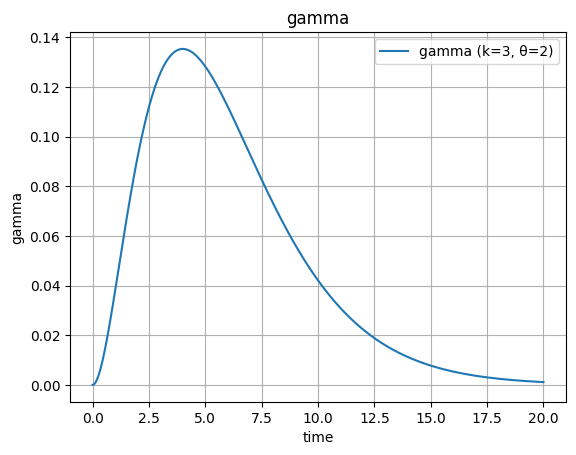

5시간 이내에 사건이 발생할 확률: 0.3233


In [131]:
# 감마분포 파라미터
k = 3 # 형태 모수(사건 횟수)
theta = 2 # 척도 모수

# 감마분포 데이터 생성
x = np.linspace(0, 20, 1000)
y = gamma.pdf(x, a=k, scale=theta)

# 그래프 그리기
plt.plot(x, y, label=f'gamma (k={k}, θ={theta})')
plt.title('gamma')
plt.xlabel('time')
plt.ylabel('gamma')
plt.legend()
plt.grid()
plt.show()

# 특정 시간 이하일 확률 (5시간 이내에 사건 발생 확률)
prob = gamma.cdf(4, a=k, scale=theta)
print(f"5시간 이내에 사건이 발생할 확률: {prob:.4f}")